In [2]:
import functions

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from parameters.flopping_charge import * # change here to change the device: charge_qubit, flopping_spin, flopping_charge, transmon, fluxonium

plt.rcParams['text.usetex'] = True
params = {
    "backend": "ps",
    "axes.labelsize": 22,
    "font.size": 22,
    "legend.fontsize": 10,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "legend.frameon": True,
    "savefig.dpi": 100,
    "axes.linewidth": 1.5,
    'xtick.major.size' : 10,
    'xtick.major.width': 1,
    'xtick.minor.size': 7,
    'xtick.minor.width': 1,
    'ytick.major.size' : 10,
    'ytick.major.width': 1,
    'ytick.minor.size': 7,
    'ytick.minor.width': 1,
    'axes.xmargin' : 0,
    'axes.ymargin' : 0,
}
plt.rcParams.update(params)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('text', usetex=True)

In [3]:
A_q = 0.1*wq
wr = 0.46

Alist = np.linspace(0,1,50)
num_A = 40

evals_list = []

N_replicas = [-4,-3,-2,-1,0,1,2,3,4]

for ii in N_replicas:
    evals = functions.construct_eigenvalues_eigenstates_floquet_list(N_rep,Alist,num_A,H_sys,drive_op,wr,n_states,ii)[1]
    evals = np.concatenate((np.array(evals[::-1])[:-1],np.array(evals)))
    evals_list.append(evals)

A_list_replica = np.concatenate((-np.array(Alist[::-1])[:-1],np.array(Alist)))

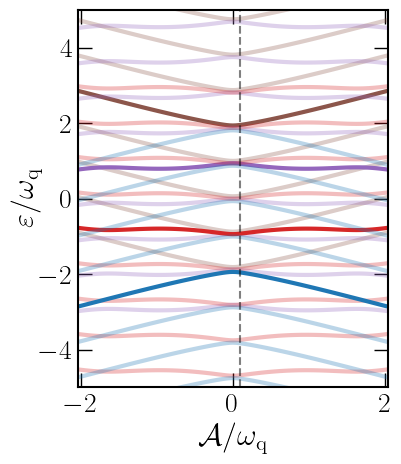

In [5]:
%matplotlib inline

fig, ax_replica = plt.subplots(figsize=(4,5), dpi=100)

cmap = mpl.colormaps["tab10"]
colors = cmap.colors

color_list = [colors[0], colors[3], colors[4], colors[5]]

n_states_show = n_states

for ii,current_replica in enumerate(N_replicas):
    for n in range(n_states_show):
        if current_replica == 0:
            ax_replica.plot(A_list_replica/wq, evals_list[ii][:,n]/wq, c=color_list[n], lw=3)
        else:
            ax_replica.plot(A_list_replica/wq, evals_list[ii][:,n]/wq, c=color_list[n], lw=3, alpha=0.3)

ax_replica.xaxis.set_tick_params(direction="in", which='both')
ax_replica.yaxis.set_tick_params(direction="in", which='both')
ax_replica.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_replica.set_xlabel(r'$\mathcal A/\omega_{\rm q}$')
ax_replica.set_ylabel(r'$\varepsilon/\omega_{\rm q}$', labelpad=-2)

ax_replica.set_ylim([-5,5])

ax_replica.axvline(x=A_q/wq, ls='--', color='black', alpha=0.5)